#Load Data

In [ ]:
# !rm -rf /content/*

In [1]:
!pip install torchvision scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 81.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import librosa
import pandas as pd
import seaborn as sns
import cv2
from tqdm import tqdm
import shutil
from google.colab import drive
import random
import albumentations as A
from sklearn.model_selection import train_test_split
import gc
from sklearn.preprocessing import LabelEncoder
from collections import Counter


In [3]:
!pip install gdown
!pip install rarfile

import rarfile
import gdown

In [4]:
dataset_path = "/content/toyota_dataset/toyota_cars"
resized_path = "/content/resized_toyota_cars"
data_path = "/content/data_toyota_cars"
normalized_path = "/content/normalized_toyota_cars"
labels_file = 'selected_toyota_car_models.csv'

In [7]:
drive.mount('/content/drive', force_remount=True)
file_path = "/content/drive/My Drive/dataSet/toyota_cars.rar"

if os.path.exists(file_path):
    print(" فایل در مسیر مشخص شده موجود است!")
else:
    print(" فایل یافت نشد! مسیر را بررسی کنید.")


Mounted at /content/drive
 فایل در مسیر مشخص شده موجود است!


In [8]:
extract_path = "/content/toyota_dataset"
if not os.path.exists(extract_path):
    print(" در حال استخراج فایل...")
    with rarfile.RarFile(file_path, 'r') as rar_ref:
        rar_ref.extractall(extract_path)
    print(" فایل با موفقیت استخراج شد!")
else:
    print(" فایل از قبل استخراج شده است!")

 در حال استخراج فایل...
 فایل با موفقیت استخراج شد!


<ipython-input-9-7cfc4c5e445d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(car_counts.keys()), y=list(car_counts.values()), palette="viridis")


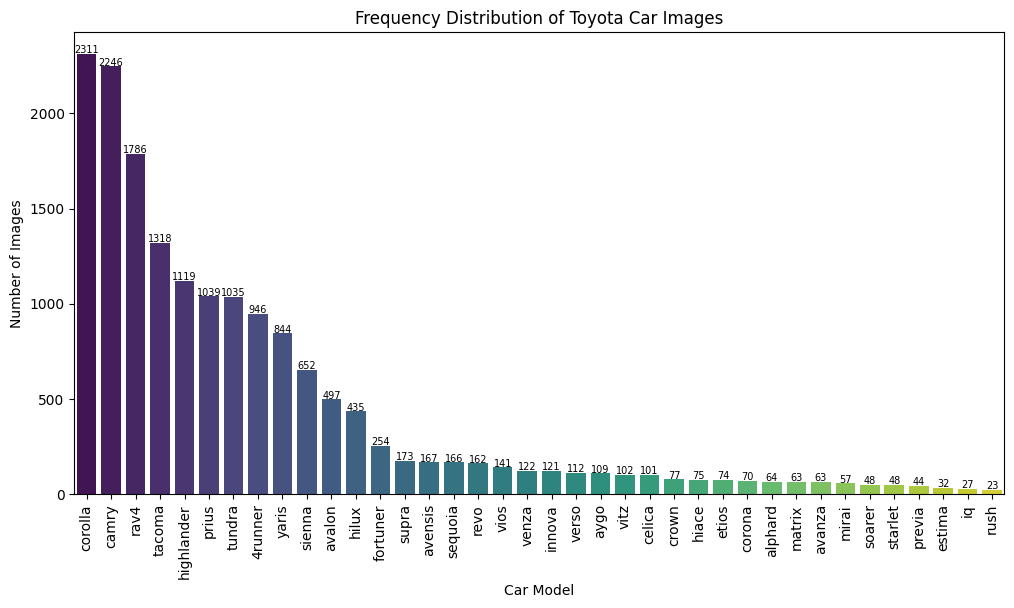

     Car Model  Number of Images
0      corolla              2311
1        camry              2246
2         rav4              1786
3       tacoma              1318
4   highlander              1119
5        prius              1039
6       tundra              1035
7      4runner               946
8        yaris               844
9       sienna               652
10      avalon               497
11       hilux               435
12    fortuner               254
13       supra               173
14     avensis               167
15     sequoia               166
16        revo               162
17        vios               141
18       venza               122
19      innova               121
20       verso               112
21        aygo               109
22        vitz               102
23      celica               101
24       crown                77
25       hiace                75
26       etios                74
27      corona                70
28     alphard                64
29      ma

In [9]:
# شمارش تعداد تصاویر در هر کلاس
car_counts = {car_model: len(os.listdir(os.path.join(dataset_path, car_model)))
              for car_model in os.listdir(dataset_path)}

# مرتب‌سازی بر اساس تعداد تصاویر
car_counts = dict(sorted(car_counts.items(), key=lambda item: item[1], reverse=True))

#  رسم نمودار فراوانی با نمایش تعداد تصاویر
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=list(car_counts.keys()), y=list(car_counts.values()), palette="viridis")

# افزودن تعداد تصاویر به بالای هر ستون
for i, count in enumerate(car_counts.values()):
    ax.text(i, count + 5, str(count), ha='center', fontsize=7)

plt.xticks(rotation=90)  # چرخش نام‌ها برای نمایش بهتر
plt.xlabel("Car Model")
plt.ylabel("Number of Images")
plt.title("Frequency Distribution of Toyota Car Images")
plt.show()

#  نمایش تعداد تصاویر به‌صورت DataFrame
df_counts = pd.DataFrame(list(car_counts.items()), columns=["Car Model", "Number of Images"])
print(df_counts)


#Encode Car Model to Label

In [10]:
# ایجاد DataFrame از مدل‌های خودرو
df_counts = pd.DataFrame(list(car_counts.items()), columns=["Car Model", "Number of Images"])

# تبدیل نام مدل خودروها به مقادیر عددی
label_encoder = LabelEncoder()
df_counts["Car Model Encoded"] = label_encoder.fit_transform(df_counts["Car Model"])

# نمایش DataFrame با مقادیر عددی
print(df_counts)


df_counts.to_csv("toyota_car_labels.csv", index=False)
print(" Data saved as 'toyota_car_labels.csv'")



     Car Model  Number of Images  Car Model Encoded
0      corolla              2311                  8
1        camry              2246                  6
2         rav4              1786                 23
3       tacoma              1318                 31
4   highlander              1119                 15
5        prius              1039                 22
6       tundra              1035                 32
7      4runner               946                  0
8        yaris               844                 37
9       sienna               652                 27
10      avalon               497                  2
11       hilux               435                 16
12    fortuner               254                 13
13       supra               173                 30
14     avensis               167                  4
15     sequoia               166                 26
16        revo               162                 24
17        vios               141                 35
18       ven

#Selected Car Models

In [11]:
selected_models = [
    "soarer", "supra", "hilux", "Vitz", "camry",
    "4runner", "prius", "tundra", "iq", "alphard"
]

# تبدیل همه مقادیر به حروف کوچک و حذف فاصله‌های اضافی
df_counts['Car Model'] = df_counts['Car Model'].str.strip().str.lower()
selected_models = [model.lower() for model in selected_models]

# فیلتر کردن DataFrame بر اساس مدل‌های انتخاب‌شده
df_selected = df_counts[df_counts['Car Model'].isin(selected_models)]

print("Selected Car Models for Further Processing:")
print(df_selected)

df_selected.to_csv("selected_toyota_car_models.csv", index=False)
print("Selected car models saved as 'selected_toyota_car_models.csv'")



Selected Car Models for Further Processing:
   Car Model  Number of Images  Car Model Encoded
1      camry              2246                  6
5      prius              1039                 22
6     tundra              1035                 32
7    4runner               946                  0
11     hilux               435                 16
13     supra               173                 30
22      vitz               102                 36
28   alphard                64                  1
32    soarer                48                 28
36        iq                27                 18
Selected car models saved as 'selected_toyota_car_models.csv'


#change Image Size to 224*224

In [12]:
# اگر پوشه وجود داشت، آن را حذف کن
if os.path.exists(resized_path):
    print(" Removing existing resized dataset...")
    shutil.rmtree(resized_path)

In [13]:


# بارگذاری برچسب‌ها از فایل CSV
df_labels = pd.read_csv("selected_toyota_car_models.csv")  # استفاده از فایل جدید
label_encoder = LabelEncoder()

# کدگذاری برچسب‌ها
df_labels["Car Model Encoded"] = label_encoder.fit_transform(df_labels["Car Model"])

# ایجاد پوشه ذخیره تغییر اندازه تصاویر
os.makedirs(resized_path, exist_ok=True)

# تغییر اندازه تصاویر برای مدل‌های انتخاب‌شده
img_size = (224, 224)

# پردازش مدل‌های انتخاب‌شده
for model in df_labels["Car Model"].unique():
    model_path = os.path.join(dataset_path, model)
    save_path = os.path.join(resized_path, model)

    # ایجاد پوشه برای ذخیره تصاویر پردازش‌شده
    os.makedirs(save_path, exist_ok=True)

    print(f"Processing images for: {model}...")

    # پردازش تمام تصاویر در هر کلاس
    for img_name in tqdm(os.listdir(model_path)):
        img_path = os.path.join(model_path, img_name)

        # خواندن تصویر
        img = cv2.imread(img_path)
        if img is None:
            continue  # رد کردن تصاویر خراب

        # تغییر اندازه به 224x224
        img_resized = cv2.resize(img, img_size)

        # تبدیل نام مدل به برچسب عددی
        model_encoded = df_labels[df_labels["Car Model"] == model]["Car Model Encoded"].values[0]

        # ذخیره تصویر تغییر اندازه داده‌شده با برچسب عددی
        new_img_name = f"{model_encoded}_{img_name}"  # نام تصویر با برچسب عددی
        cv2.imwrite(os.path.join(save_path, new_img_name), img_resized)

print("All images resized and saved successfully!")


Processing images for: camry...


100%|██████████| 2246/2246 [00:10<00:00, 215.08it/s]


Processing images for: prius...


100%|██████████| 1039/1039 [00:03<00:00, 319.83it/s]


Processing images for: tundra...


100%|██████████| 1035/1035 [00:06<00:00, 170.60it/s]


Processing images for: 4runner...


100%|██████████| 946/946 [00:05<00:00, 183.98it/s]


Processing images for: hilux...


100%|██████████| 435/435 [00:01<00:00, 239.13it/s]


Processing images for: supra...


100%|██████████| 173/173 [00:01<00:00, 104.28it/s]


Processing images for: vitz...


100%|██████████| 102/102 [00:00<00:00, 243.07it/s]


Processing images for: alphard...


100%|██████████| 64/64 [00:00<00:00, 210.71it/s]


Processing images for: soarer...


100%|██████████| 48/48 [00:00<00:00, 213.86it/s]


Processing images for: iq...


100%|██████████| 27/27 [00:00<00:00, 188.09it/s]

All images resized and saved successfully!


#change Image Pixels to Range 1 and 0 code[0,1]

In [ ]:
# ذخیره تصاویر نرمال‌سازی‌شده
normalized_images = []
image_labels = []

# پردازش تمام تصاویر در مدل‌های انتخاب‌شده
for model in selected_models:
    model_path = os.path.join(resized_path, model)

    print(f" Normalizing images for: {model}...")

    for img_name in tqdm(os.listdir(model_path)):
        img_path = os.path.join(model_path, img_name)

        # خواندن تصویر
        img = cv2.imread(img_path)
        if img is None:
            continue  # رد کردن تصاویر خراب

        # تبدیل مقادیر پیکسلی به محدوده [0,1]
        img_normalized = img.astype(np.float32) / 255.0

        # ذخیره در آرایه
        normalized_images.append(img_normalized)
        image_labels.append(model)  # ذخیره نام مدل برای برچسب‌ها

# تبدیل به آرایه NumPy
normalized_images = np.array(normalized_images)
image_labels = np.array(image_labels)

print(f" Normalization completed! Total images processed: {len(normalized_images)}")


 Normalizing images for: soarer...


100%|██████████| 48/48 [00:00<00:00, 976.99it/s]


 Normalizing images for: supra...


100%|██████████| 172/172 [00:00<00:00, 808.11it/s]


 Normalizing images for: hilux...


100%|██████████| 435/435 [00:00<00:00, 718.04it/s]


 Normalizing images for: vitz...


100%|██████████| 102/102 [00:00<00:00, 774.47it/s]


 Normalizing images for: camry...


100%|██████████| 2245/2245 [00:02<00:00, 1015.80it/s]


 Normalizing images for: 4runner...


100%|██████████| 946/946 [00:00<00:00, 992.21it/s]


 Normalizing images for: prius...


100%|██████████| 1039/1039 [00:01<00:00, 1013.19it/s]


 Normalizing images for: tundra...


100%|██████████| 1035/1035 [00:01<00:00, 1007.19it/s]


 Normalizing images for: iq...


100%|██████████| 27/27 [00:00<00:00, 990.91it/s]


 Normalizing images for: alphard...


100%|██████████| 63/63 [00:00<00:00, 973.80it/s]


 Normalization completed! Total images processed: 6112


#Data Augmentation

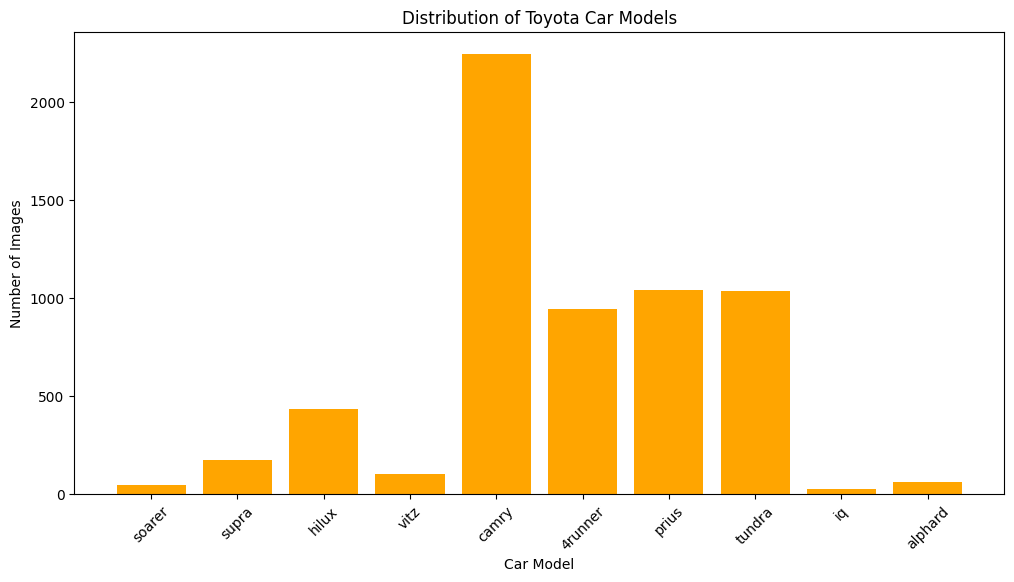

In [ ]:
# شمارش تعداد تصاویر در هر کلاس
class_counts = {model: len(os.listdir(os.path.join(resized_path, model))) for model in selected_models}

# رسم نمودار فراوانی
plt.figure(figsize=(12,6))
plt.bar(class_counts.keys(), class_counts.values(), color='Orange')
plt.xlabel("Car Model")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.title("Distribution of Toyota Car Models")
plt.show()


In [ ]:
# بررسی تعداد تصاویر هر کلاس پس از داده افزایی
class_counts = {model: len(os.listdir(os.path.join(resized_path, model)))
                for model in os.listdir(resized_path)
                if os.path.isdir(os.path.join(resized_path, model))}

# نمایش تعداد نمونه‌ها در هر کلاس
for model, count in class_counts.items():
    print(f"{model}: {count}")


soarer: 48
tundra: 1035
alphard: 63
supra: 172
vitz: 102
hilux: 435
prius: 1039
4runner: 946
camry: 2245
iq: 27


## Augmentation

In [14]:
# اگر پوشه وجود داشت، آن را حذف کن
if os.path.exists(data_path):
    print(" Removing existing resized dataset...")
    shutil.rmtree(data_path)

In [15]:
# دریافت تعداد تصاویر هر کلاس
class_counts = {model: len(os.listdir(os.path.join(resized_path, model)))
                for model in os.listdir(resized_path)
                if os.path.isdir(os.path.join(resized_path, model))}

# تعریف تعداد هدف برای هر کلاس
target_count = 500

# تعریف تبدیلات داده افزایی
augment = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Rotate(limit=20, p=0.5),
    A.GaussianBlur(p=0.2),
    A.CoarseDropout(p=0.2),
    A.Resize(224, 224)
])

# پردازش هر کلاس
for model, num_images in class_counts.items():
    model_path = os.path.join(resized_path, model)
    data_model_path = os.path.join(data_path, model)

    # اگر پوشه مقصد وجود نداشته باشد، آن را بسازید
    if not os.path.exists(data_model_path):
        os.makedirs(data_model_path)

    print(f"Processing {model} - Current: {num_images}, Target: {target_count}")

    images = os.listdir(model_path)

    # اگر تعداد تصاویر بیشتر از 1000 باشد، تصاویر اضافی را حذف می‌کنیم
    if num_images > target_count:
        excess_images = random.sample(images, num_images - target_count)  # تصادفی انتخاب کردن تصاویر اضافی
        for img_name in excess_images:
            os.remove(os.path.join(model_path, img_name))  # حذف تصاویر اضافی
        num_images = target_count  # بروزرسانی تعداد تصاویر پس از حذف

    # اگر تعداد تصاویر کمتر از 1000 باشد، داده افزایی انجام می‌دهیم
    if num_images < target_count:
        while num_images < target_count:
            for img_name in images:
                if num_images >= target_count:
                    break

                img_path = os.path.join(model_path, img_name)
                img = cv2.imread(img_path)

                if img is None:
                    continue

                # اعمال داده افزایی بر روی تصویر
                augmented = augment(image=img)['image']

                # ذخیره تصویر جدید در پوشه مقصد (normalized_path) بدون نرمال‌سازی
                new_img_name = f"aug_{num_images}_{img_name}"
                cv2.imwrite(os.path.join(data_model_path, new_img_name), augmented)  # ذخیره تصویر به حالت [0, 255]

                num_images += 1  # بروزرسانی تعداد تصاویر

    # ذخیره تصاویر قدیمی (اصلی) به پوشه مقصد (normalized_path)
    for img_name in images:
        img_path = os.path.join(model_path, img_name)
        img = cv2.imread(img_path)

        if img is None:
            continue

        # ذخیره تصویر اصلی به پوشه مقصد (normalized_path) بدون تغییر
        cv2.imwrite(os.path.join(data_model_path, img_name), img)  # ذخیره تصویر به حالت [0, 255]

    print(f"Finished processing {model} - New total images: {num_images}")

print("Data Augmentation Completed Successfully!")


Processing soarer - Current: 48, Target: 500
Finished processing soarer - New total images: 500
Processing tundra - Current: 1035, Target: 500
Finished processing tundra - New total images: 500
Processing alphard - Current: 63, Target: 500
Finished processing alphard - New total images: 500
Processing supra - Current: 172, Target: 500
Finished processing supra - New total images: 500
Processing vitz - Current: 102, Target: 500
Finished processing vitz - New total images: 500
Processing hilux - Current: 435, Target: 500
Finished processing hilux - New total images: 500
Processing prius - Current: 1039, Target: 500
Finished processing prius - New total images: 500
Processing 4runner - Current: 946, Target: 500
Finished processing 4runner - New total images: 500
Processing camry - Current: 2245, Target: 500
Finished processing camry - New total images: 500
Processing iq - Current: 27, Target: 500
Finished processing iq - New total images: 500
Data Augmentation Completed Successfully!


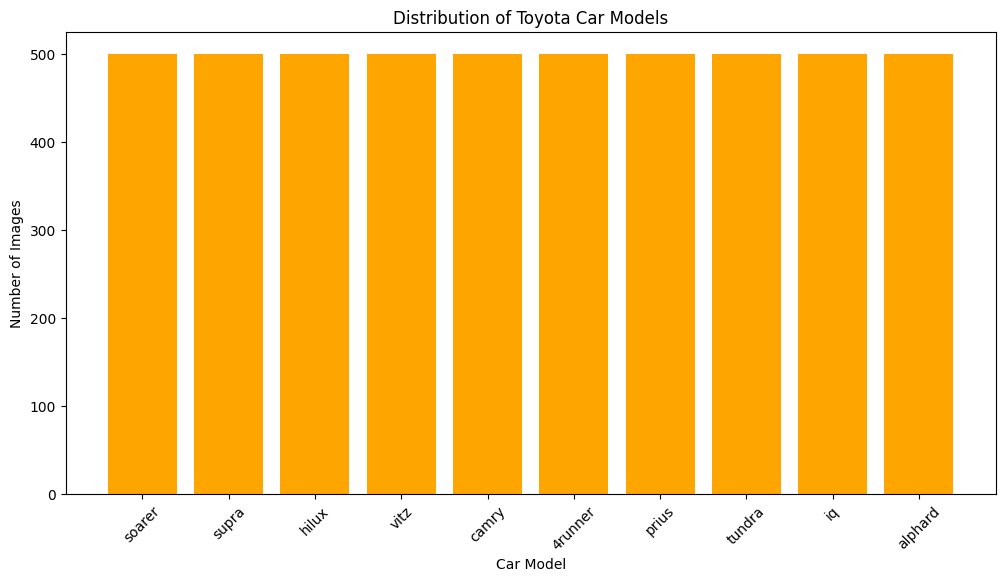

In [ ]:
# شمارش تعداد تصاویر در هر کلاس
class_counts = {model: len(os.listdir(os.path.join(data_path, model))) for model in selected_models}

# رسم نمودار فراوانی
plt.figure(figsize=(12,6))
plt.bar(class_counts.keys(), class_counts.values(), color='Orange')
plt.xlabel("Car Model")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.title("Distribution of Toyota Car Models")
plt.show()


In [ ]:
all_ok = True

for img_name in os.listdir(resized_path):
    img_path = os.path.join(resized_path, img_name)
    img = cv2.imread(img_path)

    if img is None:
        continue

    if img.shape[0] != 224 or img.shape[1] != 224:
        all_ok = False
        break

if all_ok:
    print("همه تصاویر سایز 224 در 224 دارند.")
else:
    print("برخی تصاویر سایز 224 در 224 نیستند")


همه تصاویر سایز 224 در 224 دارند.


#Normalize Data [0,1]

In [16]:
# ایجاد دایرکتوری مقصد در صورت نبودن آن
if not os.path.exists(normalized_path):
    os.makedirs(normalized_path)
# فایل لیبل‌ها

# خواندن فایل CSV برای لیبل‌ها
df_labels = pd.read_csv(labels_file)
model_label_dict = {row['Car Model']: row['Car Model Encoded'] for _, row in df_labels.iterrows()}

# مدل‌های انتخاب‌شده
selected_models = df_labels['Car Model'].tolist()  # تمام مدل‌ها از فایل CSV گرفته می‌شود

In [17]:
# پردازش تمام تصاویر در مدل‌های انتخاب‌شده
for model in selected_models:
    model_path = os.path.join(data_path, model)

    print(f"Normalizing images for: {model}...")

    # پردازش تصاویر در هر مدل
    images_normalized = []
    labels = []
    class_names = []

    for img_name in tqdm(os.listdir(model_path)):
        img_path = os.path.join(model_path, img_name)

        # خواندن تصویر
        img = cv2.imread(img_path)
        if img is None:
            continue  # رد کردن تصاویر خراب

        # تبدیل مقادیر پیکسلی به محدوده [0,1]
        img_normalized = img.astype(np.float32) / 255.0

        # اضافه کردن تصویر و لیبل به لیست‌ها
        images_normalized.append(img_normalized)
        labels.append(model_label_dict[model])  # استفاده از دیکشنری لیبل‌ها
        class_names.append(model)  # اضافه کردن نام کلاس

    # تبدیل به آرایه NumPy
    images_normalized = np.array(images_normalized)
    labels = np.array(labels)
    class_names = np.array(class_names)

    # ذخیره‌سازی هر کلاس در فایل جداگانه .npz
    class_filename = os.path.join(normalized_path, f"{model}_normalized_images.npz")
    np.savez_compressed(class_filename, images=images_normalized, labels=labels, class_names=class_names)

    print(f"Finished processing and saving {model} to {class_filename}")

print("Normalization and saving completed for all classes!")



Normalizing images for: camry...


100%|██████████| 500/500 [00:00<00:00, 1155.62it/s]


Finished processing and saving camry to /content/normalized_toyota_cars/camry_normalized_images.npz
Normalizing images for: prius...


100%|██████████| 500/500 [00:00<00:00, 1086.56it/s]


Finished processing and saving prius to /content/normalized_toyota_cars/prius_normalized_images.npz
Normalizing images for: tundra...


100%|██████████| 500/500 [00:00<00:00, 852.22it/s]


Finished processing and saving tundra to /content/normalized_toyota_cars/tundra_normalized_images.npz
Normalizing images for: 4runner...


100%|██████████| 500/500 [00:00<00:00, 1079.41it/s]


Finished processing and saving 4runner to /content/normalized_toyota_cars/4runner_normalized_images.npz
Normalizing images for: hilux...


100%|██████████| 500/500 [00:00<00:00, 1253.95it/s]


Finished processing and saving hilux to /content/normalized_toyota_cars/hilux_normalized_images.npz
Normalizing images for: supra...


100%|██████████| 500/500 [00:00<00:00, 1018.66it/s]


Finished processing and saving supra to /content/normalized_toyota_cars/supra_normalized_images.npz
Normalizing images for: vitz...


100%|██████████| 500/500 [00:00<00:00, 1105.24it/s]


Finished processing and saving vitz to /content/normalized_toyota_cars/vitz_normalized_images.npz
Normalizing images for: alphard...


100%|██████████| 500/500 [00:00<00:00, 1190.31it/s]


Finished processing and saving alphard to /content/normalized_toyota_cars/alphard_normalized_images.npz
Normalizing images for: soarer...


100%|██████████| 500/500 [00:00<00:00, 1213.62it/s]


Finished processing and saving soarer to /content/normalized_toyota_cars/soarer_normalized_images.npz
Normalizing images for: iq...


100%|██████████| 500/500 [00:00<00:00, 1229.09it/s]


Finished processing and saving iq to /content/normalized_toyota_cars/iq_normalized_images.npz
Normalization and saving completed for all classes!


#Split Train and Test Data

In [18]:
# بارگذاری فایل لیبل‌ها
label_df = pd.read_csv(labels_file)

# ساخت دیکشنری از مدل به لیبل عددی
model_to_label = dict(zip(label_df['Car Model'], label_df['Car Model Encoded']))

# مدل‌های انتخابی از فایل
selected_models = list(model_to_label.keys())

# لیست نهایی برای ذخیره داده‌ها
train_images = []
test_images = []
train_labels = []
test_labels = []

# پردازش هر کلاس
for model in selected_models:
    model_lower = model.lower()
    class_filename = os.path.join(normalized_path, f"{model_lower}_normalized_images.npz")

    if not os.path.exists(class_filename):
        print(f" فایل {class_filename} وجود ندارد. رد شد.")
        continue

    try:
        data = np.load(class_filename)
        images = data['images']
    except Exception as e:
        print(f" خطا در بارگذاری فایل {class_filename}: {e}")
        continue

    label = model_to_label[model]
    labels = np.full((images.shape[0],), label)

    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)

    train_images.append(X_train)
    test_images.append(X_test)
    train_labels.append(y_train)
    test_labels.append(y_test)





In [19]:
del data
del images
del labels

In [20]:
# تبدیل به آرایه‌های نهایی
train_images = np.concatenate(train_images, axis=0)
test_images = np.concatenate(test_images, axis=0)
train_labels = np.concatenate(train_labels, axis=0)
test_labels = np.concatenate(test_labels, axis=0)

In [21]:
# ذخیره در فایل
np.savez_compressed( 'train_data.npz', images=train_images, labels=train_labels)
np.savez_compressed('test_data.npz', images=test_images, labels=test_labels)

# نمایش اطلاعات
print(f" Done. Train images: {train_images.shape}, Test images: {test_images.shape}")

 Done. Train images: (4000, 224, 224, 3), Test images: (1000, 224, 224, 3)


In [22]:
del train_images
del test_images
del train_labels
del test_labels

`Load Data`

In [23]:
# فرض کنید که داده‌ها از فایل npz بارگذاری شده‌اند
train_data = np.load('train_data.npz')
test_data = np.load('test_data.npz')

# استخراج برچسب‌ها از داده‌های بارگذاری شده
train_labels = train_data['labels']
test_labels = test_data['labels']

# بررسی تعداد برچسب‌ها در داده‌های آموزش
train_unique_labels, train_counts = np.unique(train_labels, return_counts=True)
train_label_dict = dict(zip(train_unique_labels, train_counts))

# بررسی تعداد برچسب‌ها در داده‌های تست
test_unique_labels, test_counts = np.unique(test_labels, return_counts=True)
test_label_dict = dict(zip(test_unique_labels, test_counts))

# نمایش تعداد برچسب‌ها در داده‌های آموزش
print("Train labels count:")
for label, count in train_label_dict.items():
    print(f"Label {label}: {count} samples")

# نمایش تعداد برچسب‌ها در داده‌های تست
print("\nTest labels count:")
for label, count in test_label_dict.items():
    print(f"Label {label}: {count} samples")


Train labels count:
Label 0: 400 samples
Label 1: 400 samples
Label 6: 400 samples
Label 16: 400 samples
Label 18: 400 samples
Label 22: 400 samples
Label 28: 400 samples
Label 30: 400 samples
Label 32: 400 samples
Label 36: 400 samples

Test labels count:
Label 0: 100 samples
Label 1: 100 samples
Label 6: 100 samples
Label 16: 100 samples
Label 18: 100 samples
Label 22: 100 samples
Label 28: 100 samples
Label 30: 100 samples
Label 32: 100 samples
Label 36: 100 samples


In [24]:
# بارگذاری داده‌ها
train_images = train_data['images']
train_labels = train_data['labels']
test_images = test_data['images']
test_labels = test_data['labels']

print(train_data.files)  # نمایش کلیدهای موجود در فایل train_data
print(test_data.files)   # نمایش کلیدهای موجود در فایل test_data

['images', 'labels']
['images', 'labels']


In [ ]:
print("Train shape:", train_images.shape)
print("Train Labels Shape:", np.array(train_labels).shape)

print("Test shape:", test_images.shape)
print("Test Labels Shape:", np.array(test_labels).shape)


Train shape: (4000, 224, 224, 3)
Train Labels Shape: (4000,)
Test shape: (1000, 224, 224, 3)
Test Labels Shape: (1000,)


In [ ]:
print("Train min/max:", train_images.min(), train_images.max())
print("Test min/max:", test_images.min(), test_images.max())


Train min/max: 0.0 1.0
Test min/max: 0.0 1.0


#Feature Extraction and Train Models

In [ ]:
!pip install tensorflow

In [25]:
# ====== PyTorch (برای VGG و AlexNet) ======
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
import torchvision.transforms as transforms
from torchvision import models

# ====== TensorFlow / Keras (برای مدل ساده CNN) ======
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Resizing
from tensorflow.keras.callbacks import EarlyStopping

# ====== Scikit-learn (برای ارزیابی و لیبل‌ها) ======
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC


In [26]:
from torchvision.datasets import ImageFolder

In [27]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#Feature Extraction with VGG16

In [28]:
# تعریف ترنسفورم‌ها (تبدیل به Tensor و نرمال‌سازی)
vgg16_transform = transforms.Compose([
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [29]:
# ساخت Dataset سفارشی
class VGG16ImageDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images  # shape: (N, 224, 224, 3) در بازه [0, 1]
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]

        # به float32 و تبدیل به tensor
        image = image.astype(np.float32)
        image = torch.from_numpy(image).permute(2, 0, 1)  # [H, W, C] → [C, H, W]

        if self.transform:
            image = self.transform(image)
        return image, label



In [30]:
vgg16_train_dataset = VGG16ImageDataset(train_images, train_labels, transform=vgg16_transform)
vgg16_test_dataset = VGG16ImageDataset(test_images, test_labels, transform=vgg16_transform)



In [31]:
vgg16_train_loader = DataLoader(vgg16_train_dataset, batch_size=16, shuffle=False)
vgg16_test_loader = DataLoader(vgg16_test_dataset, batch_size=16, shuffle=False)

In [32]:
# تابع استخراج ویژگی
def extract_vgg16_features(dataloader):
    features_list = []
    labels_list = []
    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            features = feature_extractor_vgg16(images)
            features = features.view(features.size(0), -1)  # Flatten
            features_list.append(features.cpu().numpy())
            labels_list.append(labels.numpy())
    return np.concatenate(features_list), np.concatenate(labels_list)

In [33]:
# بارگذاری مدل VGG16 بدون FC layers
vgg16_model = models.vgg16(pretrained=True).to(device)
feature_extractor_vgg16 = nn.Sequential(*list(vgg16_model.features.children())).to(device)
feature_extractor_vgg16.eval()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:06<00:00, 88.9MB/s]


Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [34]:
# استخراج ویژگی‌ها
vgg16_train_features, vgg16_train_labels = extract_vgg16_features(vgg16_train_loader)
vgg16_test_features, vgg16_test_labels = extract_vgg16_features(vgg16_test_loader)


In [35]:
# ذخیره‌سازی
np.savez_compressed("vgg16_train_features.npz", features=vgg16_train_features, labels=vgg16_train_labels)
np.savez_compressed("vgg16_test_features.npz", features=vgg16_test_features, labels=vgg16_test_labels)

In [36]:
# نمایش شکل ویژگی‌ها
print("Train Features Shape:", vgg16_train_features.shape)
print("Test Features Shape:", vgg16_test_features.shape)

Train Features Shape: (4000, 25088)
Test Features Shape: (1000, 25088)


In [37]:
del vgg16_train_features
del vgg16_train_labels
del vgg16_test_features
del vgg16_test_labels

In [38]:
del vgg16_train_loader
del vgg16_test_loader

`Load VGG16 Features`

In [39]:
# بارگذاری ویژگی‌ها از فایل‌های npz
vgg16_train_data = np.load('/content/vgg16_train_features.npz')
vgg16_test_data = np.load('/content/vgg16_test_features.npz')

In [40]:
vgg16_train_features = vgg16_train_data['features']
vgg16_train_labels = vgg16_train_data['labels']
vgg16_test_features = vgg16_test_data['features']
vgg16_test_labels = vgg16_test_data['labels']
print(f"Shape of features: {vgg16_test_features.shape}")

Shape of features: (1000, 25088)


# Train SVM model with VGG features (SVM + VGG)

In [41]:
encoder = LabelEncoder()
vgg16_train_labels = encoder.fit_transform(vgg16_train_labels)
vgg16_test_labels = encoder.transform(vgg16_test_labels)

In [ ]:
# آموزش مدل SVM با کرنل خطی
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(vgg16_train_features, vgg16_train_labels)

# پیش‌بینی‌ها
svm_predictions = svm_model.predict(vgg16_test_features)

# ارزیابی مدل
accuracy_svm = accuracy_score(vgg16_test_labels, svm_predictions)
precision_svm = precision_score(vgg16_test_labels, svm_predictions, average='weighted')
recall_svm = recall_score(vgg16_test_labels, svm_predictions, average='weighted')
f1_svm = f1_score(vgg16_test_labels, svm_predictions, average='weighted')

# نمایش نتایج
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(f"SVM Precision: {precision_svm:.4f}")
print(f"SVM Recall: {recall_svm:.4f}")
print(f"SVM F1 Score: {f1_svm:.4f}")



SVM Accuracy: 0.8420
SVM Precision: 0.8406
SVM Recall: 0.8420
SVM F1 Score: 0.8407


<Figure size 800x600 with 0 Axes>

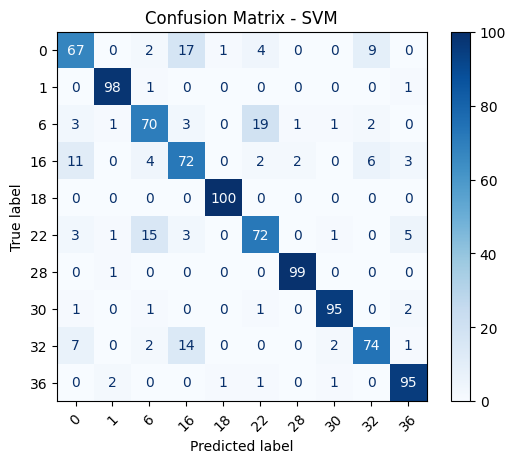

In [ ]:
# ساخت ماتریس درهم‌ریختگی
conf_mat_svm = confusion_matrix(vgg16_test_labels, svm_predictions)

# رسم ماتریس
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat_svm, display_labels=encoder.classes_)
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix - SVM")
plt.show()

#SVM(RBF) + VGG

In [42]:
encoder = LabelEncoder()
vgg16_train_labels = encoder.fit_transform(vgg16_train_labels)
vgg16_test_labels = encoder.transform(vgg16_test_labels)

In [43]:
# آموزش مدل SVM با کرنل RBF
svm_model_rbf = SVC(kernel='rbf', random_state=42)
svm_model_rbf.fit(vgg16_train_features, vgg16_train_labels)

SVC(random_state=42)

In [44]:
# پیش‌بینی‌ها
svm_predictions_rbf = svm_model_rbf.predict(vgg16_test_features)

In [45]:
# ارزیابی مدل
accuracy_rbf = accuracy_score(vgg16_test_labels, svm_predictions_rbf)
precision_rbf = precision_score(vgg16_test_labels, svm_predictions_rbf, average='weighted')
recall_rbf = recall_score(vgg16_test_labels, svm_predictions_rbf, average='weighted')
f1_rbf = f1_score(vgg16_test_labels, svm_predictions_rbf, average='weighted')

# نمایش نتایج
print(" ارزیابی SVM با کرنل RBF:")
print(f"SVM (RBF) Accuracy:  {accuracy_rbf:.4f}")
print(f"SVM (RBF) Precision: {precision_rbf:.4f}")
print(f"SVM (RBF) Recall:    {recall_rbf:.4f}")
print(f"SVM (RBF) F1 Score:  {f1_rbf:.4f}")

 ارزیابی SVM با کرنل RBF:
SVM (RBF) Accuracy:  0.8600
SVM (RBF) Precision: 0.8591
SVM (RBF) Recall:    0.8600
SVM (RBF) F1 Score:  0.8591


<Figure size 800x600 with 0 Axes>

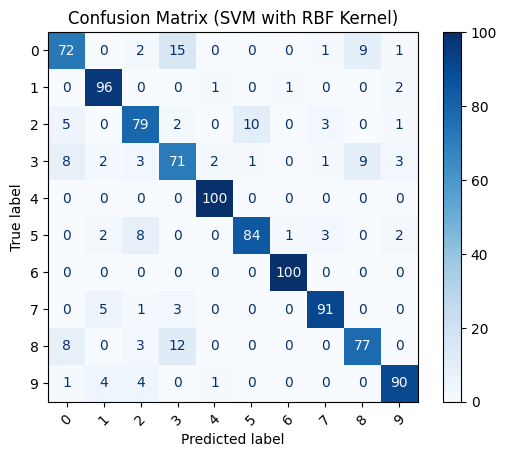

In [47]:
cm = confusion_matrix(vgg16_test_labels, svm_predictions_rbf)
# رسم ماتریس
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix (SVM with RBF Kernel)")
plt.show()

#Train VGG Model (FC Layer)

In [ ]:
fc_encoder = LabelEncoder()
vgg16_train_labels = fc_encoder.fit_transform(vgg16_train_labels)
vgg16_test_labels = fc_encoder.transform(vgg16_test_labels)
classes_len = len(fc_encoder.classes_)

In [ ]:
# تبدیل ویژگی‌ها و لیبل‌ها به tensor
vgg16_train_features_tensor = torch.tensor(vgg16_train_features, dtype=torch.float32)
vgg16_train_labels_tensor = torch.tensor(vgg16_train_labels, dtype=torch.long)

vgg16_test_features_tensor = torch.tensor(vgg16_test_features, dtype=torch.float32)
vgg16_test_labels_tensor = torch.tensor(vgg16_test_labels, dtype=torch.long)

# ساخت Dataset و DataLoader
vgg16_train_dataset = TensorDataset(vgg16_train_features_tensor, vgg16_train_labels_tensor)
vgg16_test_dataset = TensorDataset(vgg16_test_features_tensor, vgg16_test_labels_tensor)

vgg16_train_loader = DataLoader(vgg16_train_dataset, batch_size=16, shuffle=True)
vgg16_test_loader = DataLoader(vgg16_test_dataset, batch_size=16, shuffle=False)


In [ ]:
# مدل FC شبیه VGG16 (فقط بخش طبقه‌بند)
class VGG16UniqueClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(VGG16UniqueClassifier, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(input_dim, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        return self.classifier(x)

# دستگاه
vgg16_unique_model = VGG16UniqueClassifier(
    input_dim=vgg16_train_features.shape[1],
    num_classes=fc_encoder
).to(device)

In [ ]:
#بررسی اینکه آیا مقدار
#null
#وجود دارد که مانع ادامه ایپاک شود.
print(torch.isnan(vgg16_train_features_tensor).any())  # آیا NaN داره؟
print(torch.max(vgg16_train_labels_tensor))  # حداکثر کلاس


tensor(False)
tensor(9)


In [ ]:
# آموزش
vgg16_unique_criterion = nn.CrossEntropyLoss()
vgg16_unique_optimizer = optim.Adam(vgg16_unique_model.parameters(), lr=1e-4)
vgg16_unique_epochs = 20

for epoch in range(vgg16_unique_epochs):
    vgg16_unique_model.train()
    total_loss = 0
    for x_batch, y_batch in vgg16_train_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        vgg16_unique_optimizer.zero_grad()
        outputs = vgg16_unique_model(x_batch)
        loss = vgg16_unique_criterion(outputs, y_batch)
        loss.backward()
        vgg16_unique_optimizer.step()
        total_loss += loss.item()
    print(f"[VGG16] Epoch {epoch+1}/{vgg16_unique_epochs}, Loss: {total_loss:.4f}")


In [ ]:
# ارزیابی
vgg16_unique_model.eval()
vgg16_unique_preds = []
vgg16_unique_targets = []

with torch.no_grad():
    for x_batch, y_batch in vgg16_test_loader:
        x_batch = x_batch.to(device)
        outputs = vgg16_unique_model(x_batch)
        _, preds = torch.max(outputs, 1)
        vgg16_unique_preds.extend(preds.cpu().numpy())
        vgg16_unique_targets.extend(y_batch.numpy())

# متریک‌ها
vgg16_unique_acc = accuracy_score(vgg16_unique_targets, vgg16_unique_preds)
vgg16_unique_prec = precision_score(vgg16_unique_targets, vgg16_unique_preds, average='weighted')
vgg16_unique_rec = recall_score(vgg16_unique_targets, vgg16_unique_preds, average='weighted')
vgg16_unique_f1 = f1_score(vgg16_unique_targets, vgg16_unique_preds, average='weighted')

print(f"\n[VGG16 Unique Evaluation Results]")
print(f"Accuracy: {vgg16_unique_acc:.4f}")
print(f"Precision: {vgg16_unique_prec:.4f}")
print(f"Recall: {vgg16_unique_rec:.4f}")
print(f"F1 Score: {vgg16_unique_f1:.4f}")


[VGG16 Unique Evaluation Results]
Accuracy: 0.8210
Precision: 0.8401
Recall: 0.8210
F1 Score: 0.8150


<Figure size 800x600 with 0 Axes>

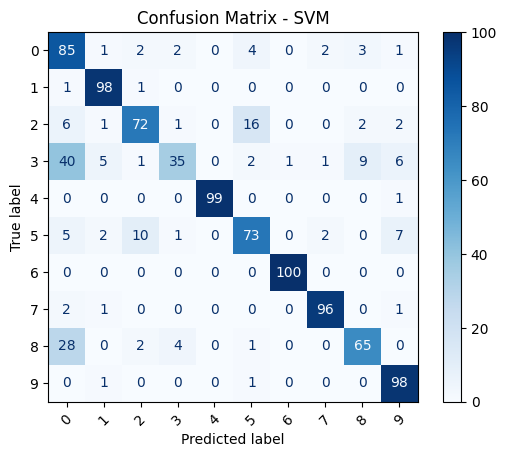

In [ ]:
# ساخت ماتریس درهم‌ریختگی
conf_mat = confusion_matrix(vgg16_unique_targets, vgg16_unique_preds)

# رسم ماتریس
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=fc_encoder.classes_)
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix - VGG")
plt.show()

#Feature Extraction with Alexnet

In [ ]:
# تبدیل به فرمت PyTorch: (N, 3, 224, 224)
train_images = np.transpose(train_images, (0, 3, 1, 2)).astype(np.float32)
test_images = np.transpose(test_images, (0, 3, 1, 2)).astype(np.float32)

In [ ]:
# ساخت DataLoader
batch_size = 16
train_dataset = TensorDataset(torch.tensor(train_images), torch.tensor(train_labels))
test_dataset = TensorDataset(torch.tensor(test_images), torch.tensor(test_labels))
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# بارگذاری AlexNet بدون FC layers
alexnet = models.alexnet(pretrained=True)
feature_extractor = nn.Sequential(*list(alexnet.features.children()))
feature_extractor.to(device)
feature_extractor.eval()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:04<00:00, 50.6MB/s]


Sequential(
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU(inplace=True)
  (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace=True)
  (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace=True)
  (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
)

In [ ]:
# تابع استخراج ویژگی
def extract_features(dataloader):
    features_list = []
    labels_list = []
    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            features = feature_extractor(images)
            features = features.view(features.size(0), -1)  # Flatten
            features_list.append(features.cpu().numpy())
            labels_list.append(labels.cpu().numpy())
    return np.concatenate(features_list), np.concatenate(labels_list)

In [ ]:
# استخراج ویژگی‌ها
train_features, train_labels = extract_features(train_loader)
test_features, test_labels = extract_features(test_loader)

In [ ]:
# ذخیره ویژگی‌ها به صورت فشرده
np.savez_compressed('alexnet_train_features.npz',
                    features=train_features, labels=train_labels)

np.savez_compressed('alexnet_test_features.npz',
                    features=test_features, labels=test_labels)

# نمایش اندازه ویژگی‌ها
print(f"Train Features Shape: {train_features.shape}")
print(f"Test Features Shape: {test_features.shape}")

Train Features Shape: (4000, 9216)
Test Features Shape: (1000, 9216)


`Load AlexNet Features`

In [ ]:
alexnet_train_data  = np.load('alexnet_train_features.npz')
alexnet_test_data  = np.load( 'alexnet_test_features.npz')

In [ ]:
alexnet_train_features_unique  = alexnet_train_data['features']
alexnet_train_labels_unique  = alexnet_train_data['labels']
alexnet_test_features_unique  = alexnet_test_data['features']
alexnet_test_labels_unique  = alexnet_test_data['labels']
#الان (N, 3, 224, 224) اما برای الکس نت باید به شکل (1000, 256, 6, 6) در بیان
print(f"Shape of features: {test_features.shape}")

Shape of features: (1000, 9216)


#Train AlexNet Model (FC Layer)

In [ ]:
# تنظیمات کلی
batch_size = 16
num_epochs = 20
learning_rate = 1e-4
input_dim = 9216     # اگر VGG بود مثلا 25088، اگر EfficientNet بود شاید 1408


In [ ]:
alexnet_train_features_unique.shape[1]

9216

In [ ]:
# انکود کردن برچسب‌ها برای داشتن کلاس‌های 0 تا N-1
label_encoder_alexnet = LabelEncoder()
alexnet_train_labels_encoded_unique = label_encoder_alexnet.fit_transform(alexnet_train_labels_unique)
alexnet_test_labels_encoded_unique = label_encoder_alexnet.transform(alexnet_test_labels_unique)
num_classes_alexnet = len(label_encoder_alexnet.classes_)
num_classes = num_classes_alexnet

In [ ]:
# تبدیل ویژگی‌ها به Tensor و انتقال به دستگاه (GPU یا CPU)
alexnet_train_features_tensor_unique = torch.tensor(alexnet_train_features_unique, dtype=torch.float32)
alexnet_train_labels_tensor_unique = torch.tensor(alexnet_train_labels_encoded_unique, dtype=torch.long)
alexnet_test_features_tensor_unique = torch.tensor(alexnet_test_features_unique, dtype=torch.float32)
alexnet_test_labels_tensor_unique = torch.tensor(alexnet_test_labels_encoded_unique, dtype=torch.long)

In [ ]:
# ساخت DataLoader
batch_size_alexnet = 16
alexnet_train_dataset = TensorDataset(alexnet_train_features_tensor_unique, alexnet_train_labels_tensor_unique)
alexnet_test_dataset = TensorDataset(alexnet_test_features_tensor_unique, alexnet_test_labels_tensor_unique)

alexnet_train_loader = DataLoader(alexnet_train_dataset, batch_size=batch_size_alexnet, shuffle=True)
alexnet_test_loader = DataLoader(alexnet_test_dataset, batch_size=batch_size_alexnet, shuffle=False)

In [ ]:
# تعریف مدل FC بر اساس معماری AlexNet
class AlexNetUniqueClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(AlexNetUniqueClassifier, self).__init__()
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(input_dim, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        return self.classifier(x)

# دستگاه
alexnet_unique_device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
alexnet_unique_model = AlexNetUniqueClassifier(
    input_dim=alexnet_train_features_unique.shape[1],
    num_classes=10
).to(alexnet_unique_device)


In [ ]:
# آموزش
alexnet_unique_criterion = nn.CrossEntropyLoss()
alexnet_unique_optimizer = optim.Adam(alexnet_unique_model.parameters(), lr=1e-4)
alexnet_unique_epochs = 20

In [ ]:
for epoch in range(alexnet_unique_epochs):
    alexnet_unique_model.train()
    total_loss = 0
    for x_batch, y_batch in alexnet_train_loader:
        x_batch, y_batch = x_batch.to(alexnet_unique_device), y_batch.to(alexnet_unique_device)
        alexnet_unique_optimizer.zero_grad()
        outputs = alexnet_unique_model(x_batch)
        loss = alexnet_unique_criterion(outputs, y_batch)
        loss.backward()
        alexnet_unique_optimizer.step()
        total_loss += loss.item()
    print(f"[AlexNet] Epoch {epoch+1}/{alexnet_unique_epochs}, Loss: {total_loss:.4f}")


[AlexNet] Epoch 1/20, Loss: 409.7546
[AlexNet] Epoch 2/20, Loss: 244.0266
[AlexNet] Epoch 3/20, Loss: 174.7101
[AlexNet] Epoch 4/20, Loss: 144.1529
[AlexNet] Epoch 5/20, Loss: 116.2978
[AlexNet] Epoch 6/20, Loss: 101.0291
[AlexNet] Epoch 7/20, Loss: 84.3162
[AlexNet] Epoch 8/20, Loss: 73.8005
[AlexNet] Epoch 9/20, Loss: 61.4698
[AlexNet] Epoch 10/20, Loss: 60.8608
[AlexNet] Epoch 11/20, Loss: 53.1380
[AlexNet] Epoch 12/20, Loss: 46.1229
[AlexNet] Epoch 13/20, Loss: 41.5197
[AlexNet] Epoch 14/20, Loss: 45.1431
[AlexNet] Epoch 15/20, Loss: 38.6185
[AlexNet] Epoch 16/20, Loss: 35.8876
[AlexNet] Epoch 17/20, Loss: 32.4776
[AlexNet] Epoch 18/20, Loss: 26.0721
[AlexNet] Epoch 19/20, Loss: 31.2909
[AlexNet] Epoch 20/20, Loss: 31.6251


In [ ]:
# ارزیابی
alexnet_unique_model.eval()
alexnet_unique_preds = []
alexnet_unique_targets = []

with torch.no_grad():
    for x_batch, y_batch in alexnet_test_loader:
        x_batch = x_batch.to(alexnet_unique_device)
        outputs = alexnet_unique_model(x_batch)
        _, preds = torch.max(outputs, 1)
        alexnet_unique_preds.extend(preds.cpu().numpy())
        alexnet_unique_targets.extend(y_batch.numpy())

# متریک‌ها
alexnet_unique_acc = accuracy_score(alexnet_unique_targets, alexnet_unique_preds)
alexnet_unique_prec = precision_score(alexnet_unique_targets, alexnet_unique_preds, average='weighted')
alexnet_unique_rec = recall_score(alexnet_unique_targets, alexnet_unique_preds, average='weighted')
alexnet_unique_f1 = f1_score(alexnet_unique_targets, alexnet_unique_preds, average='weighted')

print(f"\n[AlexNet Unique Evaluation Results]")
print(f"Accuracy: {alexnet_unique_acc:.4f}")
print(f"Precision: {alexnet_unique_prec:.4f}")
print(f"Recall: {alexnet_unique_rec:.4f}")
print(f"F1 Score: {alexnet_unique_f1:.4f}")


[AlexNet Unique Evaluation Results]
Accuracy: 0.8060
Precision: 0.8083
Recall: 0.8060
F1 Score: 0.8038


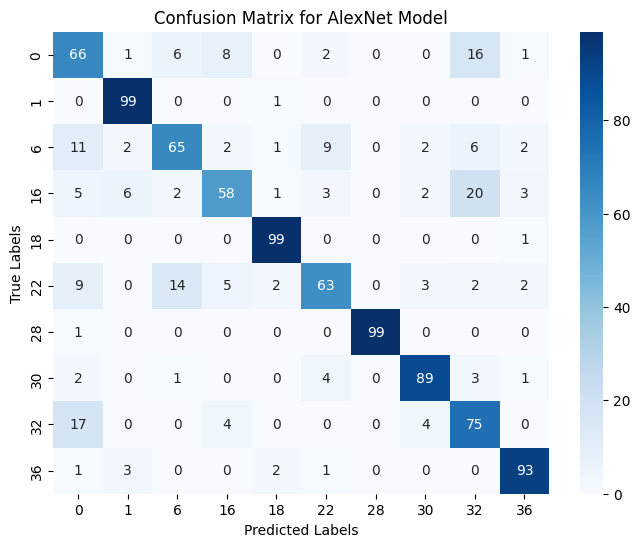

In [ ]:
# محاسبه ماتریس آشفتگی
cm = confusion_matrix(alexnet_unique_targets, alexnet_unique_preds)

# رسم ماتریس آشفتگی
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder_alexnet.classes_, yticklabels=label_encoder_alexnet.classes_)
plt.title('Confusion Matrix for AlexNet Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [ ]:
del alexnet_unique_preds
del alexnet_unique_targets

#CNN Model

In [ ]:
# بازکدگذاری لیبل‌های ناپیوسته
cnn_label_encoder = LabelEncoder()
train_labels_encoded = cnn_label_encoder.fit_transform(train_labels)
test_labels_encoded = cnn_label_encoder.transform(test_labels)
num_classes = len(cnn_label_encoder.classes_)

In [ ]:

# One-hot encoding برای مدل
y_train_cat = to_categorical(train_labels_encoded, num_classes)
y_test_cat = to_categorical(test_labels_encoded, num_classes)

In [ ]:
from tensorflow.keras.layers import Input


In [ ]:
# تعریف مدل CNN ساده
model = Sequential([
    Input(shape=(224, 224, 3)),
    # تغییر اندازه تصاویر به 224x224
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# کامپایل مدل
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, y_train_cat,
          epochs=20,
          batch_size=16,
          validation_split=0.1)

Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 448s 2s/step - accuracy: 0.1813 - loss: 2.3209 - val_accuracy: 0.0000e+00 - val_loss: 8.1406
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 412s 2s/step - accuracy: 0.3799 - loss: 1.6721 - val_accuracy: 0.0000e+00 - val_loss: 8.7650
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 455s 2s/step - accuracy: 0.5813 - loss: 1.1988 - val_accuracy: 0.0000e+00 - val_loss: 13.6876
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 442s 2s/step - accuracy: 0.7427 - loss: 0.7377 - val_accuracy: 0.0000e+00 - val_loss: 21.8349
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 432s 2s/step - accuracy: 0.8529 - loss: 0.4502 - val_accuracy: 0.0000e+00 - val_loss: 23.2288
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 450s 2s/step - accuracy: 0.9054 - loss: 0.2977 - val_accuracy: 0.0000e+00 - val_loss: 25.5021
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 441s 2s/step - accuracy: 0.9302 - loss: 0.1971 - val_accuracy: 0.0000e+00 - val_loss: 29.7606
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 442s 2s/step - accuracy:

In [ ]:
# پیش‌بینی روی داده تست
y_pred_probs = model.predict(test_images)
y_pred_encoded = np.argmax(y_pred_probs, axis=1)

# ارزیابی کلی مدل
test_loss, test_acc = model.evaluate(test_images, y_test_cat)
print(f'Test Accuracy: {test_acc}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 953ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 29s 911ms/step - accuracy: 0.4728 - loss: 3.2582
Test Accuracy: 0.5419999957084656


In [ ]:
# معیارهای ارزیابی
acc = accuracy_score(test_labels_encoded, y_pred_encoded)
prec = precision_score(test_labels_encoded, y_pred_encoded, average='macro')
rec = recall_score(test_labels_encoded, y_pred_encoded, average='macro')
f1 = f1_score(test_labels_encoded, y_pred_encoded, average='macro')


print(" نتایج ارزیابی مدل CNN:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

 نتایج ارزیابی مدل CNN:
Accuracy:  0.5420
Precision: 0.4927
Recall:    0.5420
F1 Score:  0.5114


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


`Confusion Matrix`

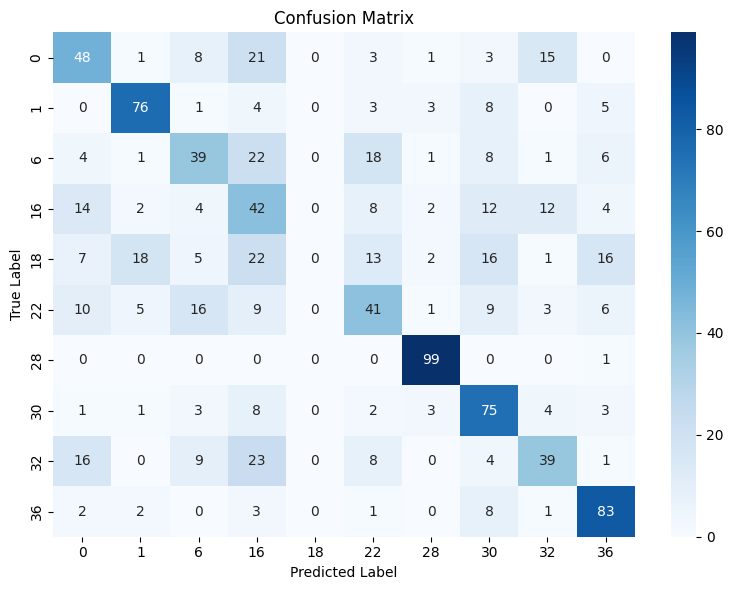

In [ ]:
# رسم ماتریس آشفتگی
cm = confusion_matrix(test_labels_encoded, y_pred_encoded)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=cnn_label_encoder.classes_,
            yticklabels=cnn_label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()